In [ ]:
#2011-2021 congressional districts in Maryland

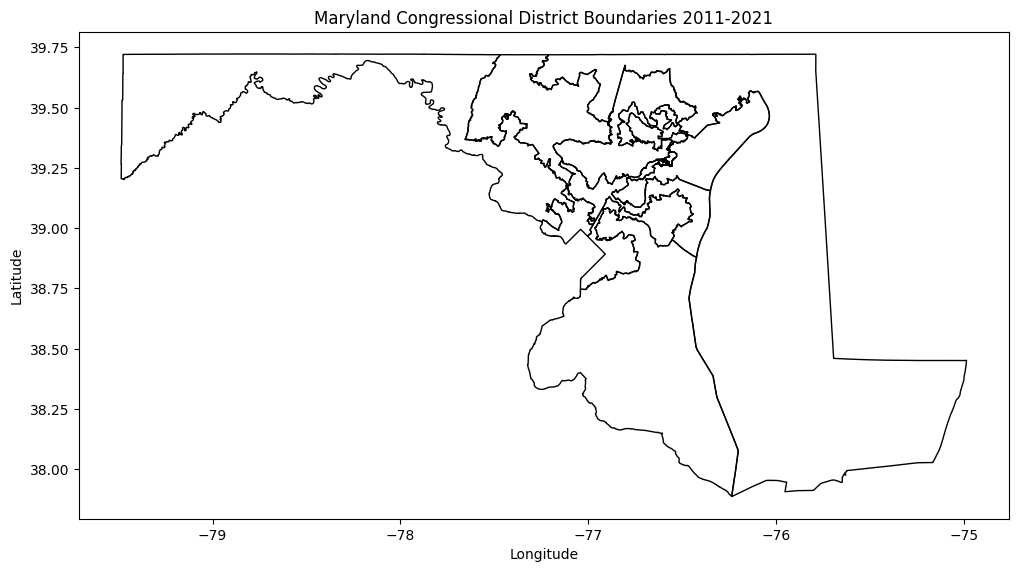

   ID     AREA DISTRICT  NAME Label  \
0   1  5530.84     2401  None     1   
1   2   518.50     2402  None     2   
2   3   401.51     2403  None     3   
3   4   316.20     2404  None     4   
4   5  2278.87     2405  None     5   

                                            geometry  
0  POLYGON ((-76.23614 37.88847, -76.23605 37.889...  
1  POLYGON ((-76.44898 39.37936, -76.44866 39.379...  
2  POLYGON ((-77.02751 39.12538, -77.0338 39.1206...  
3  POLYGON ((-77.00239 38.96583, -77.00187 38.966...  
4  POLYGON ((-76.46364 38.7111, -76.46371 38.7107...  
Index(['ID', 'AREA', 'DISTRICT', 'NAME', 'Label', 'geometry'], dtype='object')


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

districts_gdf=gpd.read_file('/content/md_cong_2011_to_2021.shp')
fig, ax = plt.subplots(figsize=(12, 10))
districts_gdf.boundary.plot(ax=ax, color="black", linewidth=1)

# Customize the plot
plt.title("Maryland Congressional District Boundaries 2011-2021")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

print(districts_gdf.head())
print(districts_gdf.columns)

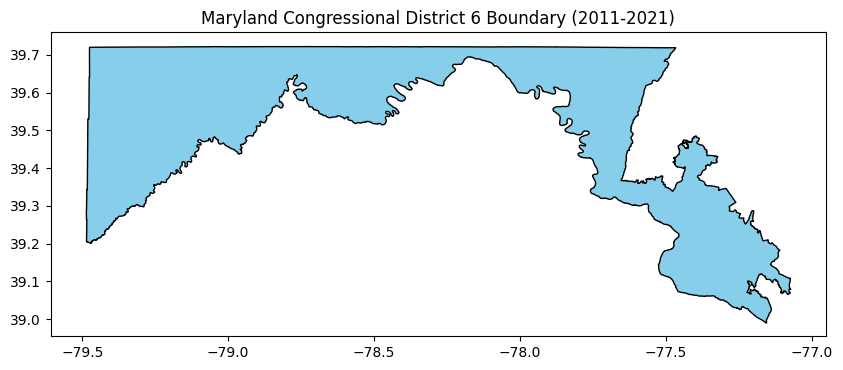

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile

gdf = gpd.read_file("/content/md_cong_2011_to_2021.shp")

district_6_variants = gdf[gdf['DISTRICT'].isin([6, '6', '06', '6.0', '06.0', '2406'])]

# Check if District 6 is found in any format
if not district_6_variants.empty:
    # Plot District 6 if found
    fig, ax = plt.subplots(figsize=(10, 10))
    district_6_variants.plot(ax=ax, color="skyblue", edgecolor="black")
    ax.set_title("Maryland Congressional District 6 Boundary (2011-2021)")
    plt.show()
else:
    print("District 6 still not found. Check column format or verify if District 6 exists in the dataset.")


In [ ]:
#2011-2021 precincts in Maryland election results (presidential + senate)

Columns in GIS data:
 Index(['NAME', 'CNG02', 'COUNTY', 'LEG02', 'VTD', 'MCD', 'STATE', 'VTD_1',
       'PLACE', 'UNADJPOP',
       ...
       'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP', 'CD',
       'HDIST', 'SEND', 'geometry'],
      dtype='object', length=101)

Data Sample:
                        NAME CNG02 COUNTY  LEG02          VTD         MCD  \
0  Somerset Precinct 02-001  2401  24039  2438A  2403902-001  2403990168   
1  Somerset Precinct 05-001  2401  24039  2438A  2403905-001  2403990444   
2  Somerset Precinct 03-001  2401  24039  2438A  2403903-001  2403990260   
3  Somerset Precinct 13-003  2401  24039  2438A  2403913-003  2403991176   
4  Somerset Precinct 13-002  2401  24039  2438A  2403913-002  2403991176   

  STATE   VTD_1 PLACE UNADJPOP  ...  BVAP  AMINVAP  ASIANVAP  NHPIVAP  \
0    24  02-001  None      523  ...    74        0         2        0   
1    24  05-001  None      891  ...   124        3         3        0   
2    24  03-001  None  

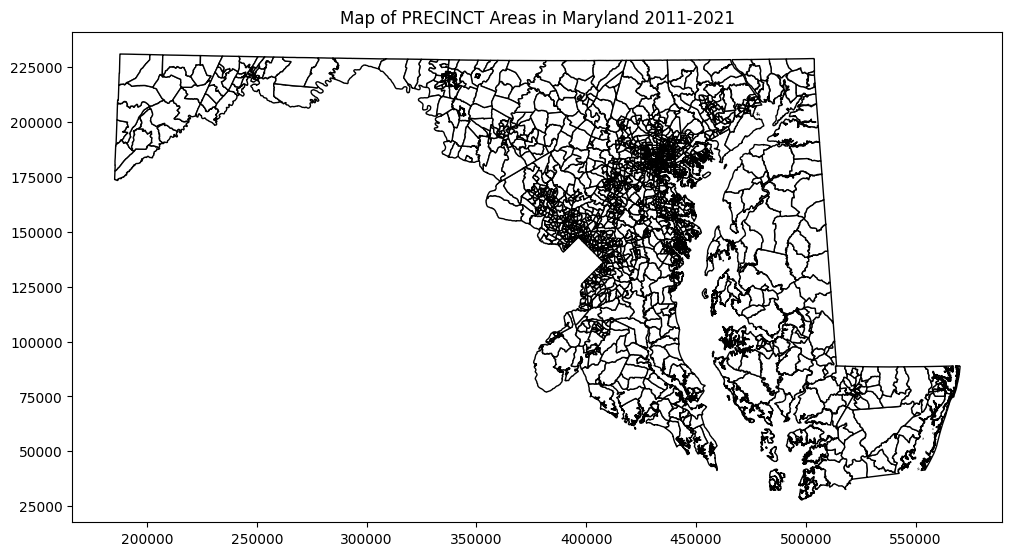

Total precincts in Maryland: 1809


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GIS shapefile
file_path = '/content/MD-precincts.shp'
gdf = gpd.read_file(file_path)

# Check which columns contain the word "PRECINCT" to identify the correct column name
print("Columns in GIS data:\n", gdf.columns)
print("\nData Sample:\n", gdf.head())

# Filter the rows containing "PRECINCT" in a specific column

precinct_data = gdf[gdf['NAME'].str.contains("PRECINCT", case=False, na=False)]

# Plot the precincts
fig, ax = plt.subplots(figsize=(12, 12))
precinct_data.plot(ax=ax, color="white", edgecolor="black")
plt.title("Map of PRECINCT Areas in Maryland 2011-2021")
plt.show()

unique_count = gdf['VTD'].nunique()

print("Total precincts in Maryland:", unique_count)

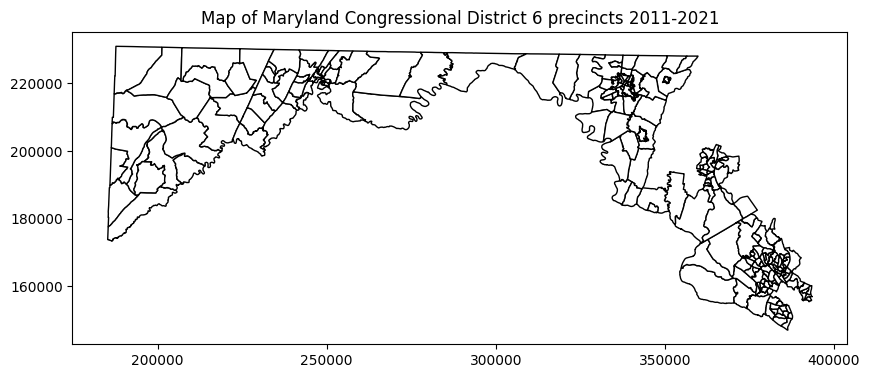

Total precincts in Maryland Congressional District 6: 216


In [ ]:
#precincts in Maryland Congressional District 6
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your shapefile data
gis_data = gpd.read_file('/content/MD-precincts.shp')

# Filter the GIS data to only include rows where the specified column has a value of 6

filtered_data = gis_data[gis_data['CD'] == '06']

# Plot the filtered data
fig, ax = plt.subplots(figsize=(10, 10))
filtered_data.plot(ax=ax, color='white', edgecolor='black')

# Set plot title and show plot
plt.title("Map of Maryland Congressional District 6 precincts 2011-2021")
plt.show()

unique_count = filtered_data['VTD'].nunique()

print("Total precincts in Maryland Congressional District 6:", unique_count)


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


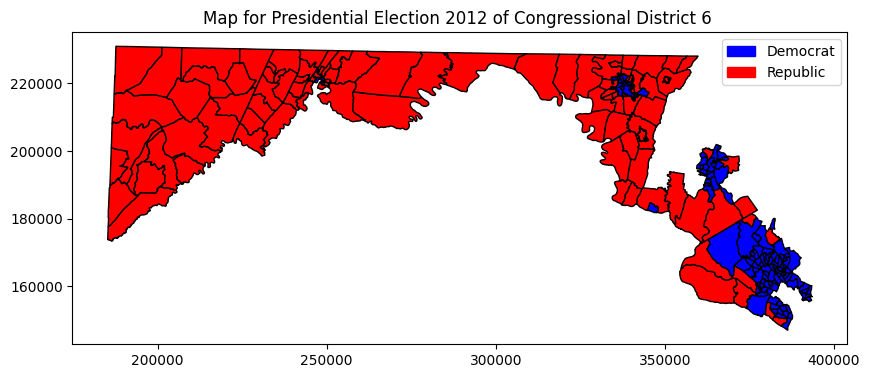

Republic party is winner: 104
Democrat party is winner: 111
PRES12R == PRES12D: 1


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


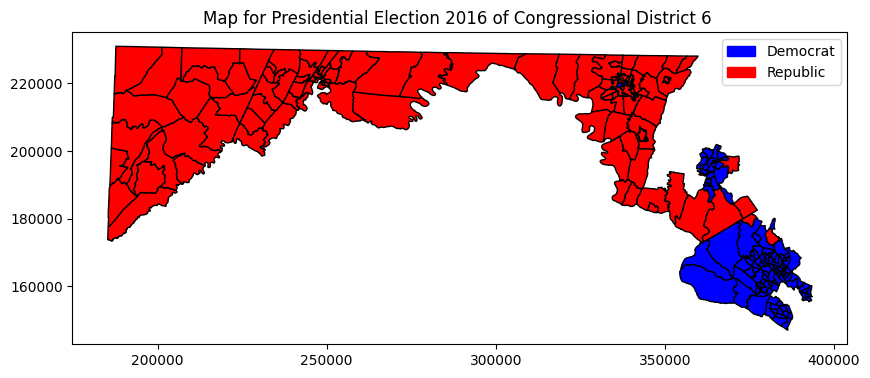

Republic party is winner: 108
Democrat party is winner: 107
PRES16R == PRES16D: 1


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Load your shapefile data
gis_data = gpd.read_file('/content/MD-precincts.shp')

filtered_data = gis_data[gis_data['CD'] == '06']

#2012 Presidential Election
def get_color_P2012(row):
    if row['PRES12R'] > row['PRES12D']:
        return 'red'  # Republican wins
    elif row['PRES12D'] > row['PRES12R']:
        return 'blue'  # Democrat wins
    else:
        return 'green'  # Other conditions or no significant votes

# Apply the color assignment function
filtered_data['color'] = filtered_data.apply(get_color_P2012, axis=1)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
filtered_data.plot(ax=ax, color=filtered_data['color'], legend=True, edgecolor='black')
plt.title("Map for Presidential Election 2012 of Congressional District 6 ")
blue_patch = mpatches.Patch(color='blue', label='Democrat')
red_patch = mpatches.Patch(color='red', label='Republic')
plt.legend(handles=[blue_patch, red_patch], loc='upper right')
# Show the plot
plt.show()
count_a_greater = (filtered_data['PRES12R'] > filtered_data['PRES12D']).sum()
count_b_greater = (filtered_data['PRES12R'] < filtered_data['PRES12D']).sum()
count_equal = (filtered_data['PRES12R'] == filtered_data['PRES12D']).sum()

# Print counts
print(f"Republic party is winner: {count_a_greater}")
print(f"Democrat party is winner: {count_b_greater}")
print(f"{'PRES12R'} == {'PRES12D'}: {count_equal}")


#2016 Presidential election

def get_color_P2016(row):
    if row['PRES16R'] > row['PRES16D']:
        return 'red'  # Republican wins
    elif row['PRES16D'] > row['PRES16R']:
        return 'blue'  # Democrat wins
    else:
        return 'green'  # Other conditions or no significant votes

# Apply the color assignment function
filtered_data['color'] = filtered_data.apply(get_color_P2016, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
filtered_data.plot(ax=ax, color=filtered_data['color'], legend=True, edgecolor='black')
plt.title("Map for Presidential Election 2016 of Congressional District 6 ")
blue_patch = mpatches.Patch(color='blue', label='Democrat')
red_patch = mpatches.Patch(color='red', label='Republic')
plt.legend(handles=[blue_patch, red_patch], loc='upper right')
# Show the plot
plt.show()

count_a_greater = (filtered_data['PRES16R'] > filtered_data['PRES16D']).sum()
count_b_greater = (filtered_data['PRES16R'] < filtered_data['PRES16D']).sum()
count_equal = (filtered_data['PRES16R'] == filtered_data['PRES16D']).sum()

# Print counts
print(f"Republic party is winner: {count_a_greater}")
print(f"Democrat party is winner: {count_b_greater}")
print(f"{'PRES16R'} == {'PRES16D'}: {count_equal}")

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


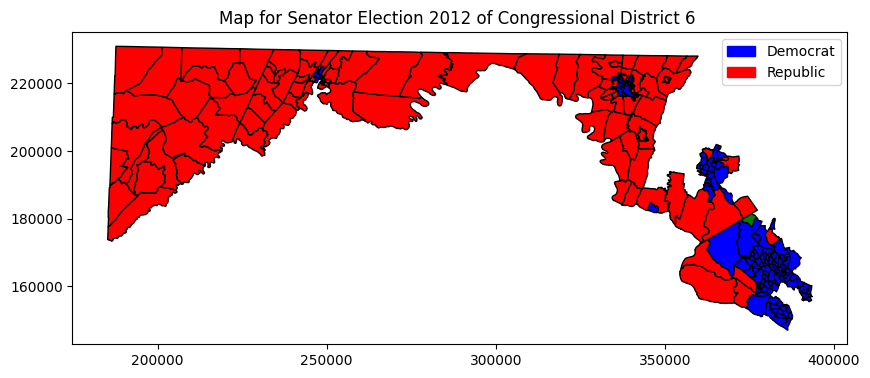

Republic party is winner: 100
Democrat party is winner: 114
SEN12R == SEN12D: 2


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


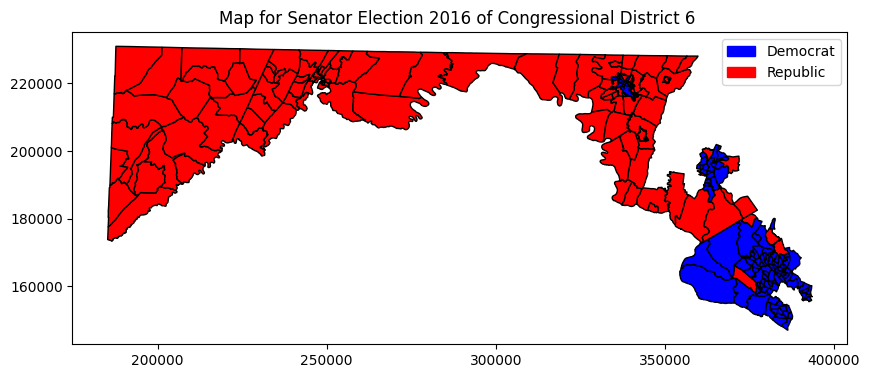

Republic party is winner: 106
Democrat party is winner: 109
equal: 1


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


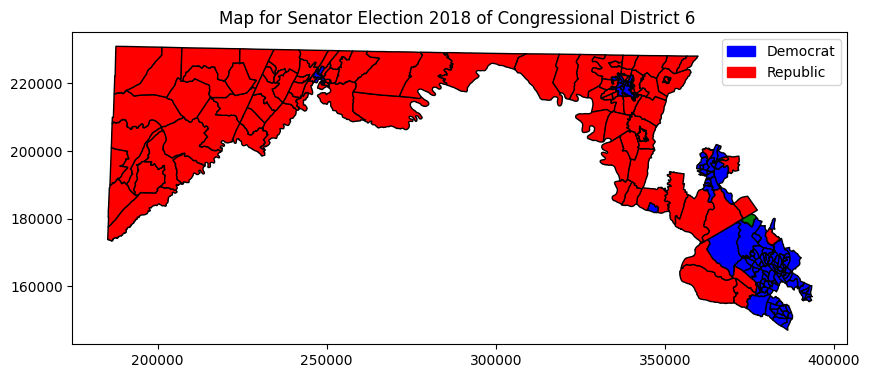

Republic party is winner: 91
Democrat party is winner: 123
Equal: 2


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Load your shapefile data
gis_data = gpd.read_file('/content/MD-precincts.shp')
gis_data.fillna(0, inplace=True)
filtered_data = gis_data[gis_data['CD'] == '06']

# Now proceed with the color assignment based on conditions
def get_color_2012(row):
    if row['SEN12R'] > row['SEN12D']:
        return 'red'  # Republican wins
    elif row['SEN12D'] > row['SEN12R']:
        return 'blue'  # Democrat wins
    else:
        return 'green'  # Other conditions or no significant votes

# Apply the color assignment function
filtered_data['color'] = filtered_data.apply(get_color_2012, axis=1)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
filtered_data.plot(ax=ax, color=filtered_data['color'], legend=True, edgecolor='black')
plt.title("Map for Senator Election 2012 of Congressional District 6 ")
blue_patch = mpatches.Patch(color='blue', label='Democrat')
red_patch = mpatches.Patch(color='red', label='Republic')
plt.legend(handles=[blue_patch, red_patch], loc='upper right')
# Show the plot
plt.show()
#counts
count_a_greater = (filtered_data['SEN12R'] > filtered_data['SEN12D']).sum()
count_b_greater = (filtered_data['SEN12R'] < filtered_data['SEN12D']).sum()
count_equal = (filtered_data['SEN12R'] == filtered_data['SEN12D']).sum()

# Print counts
print(f"Republic party is winner: {count_a_greater}")
print(f"Democrat party is winner: {count_b_greater}")
print(f"{'SEN12R'} == {'SEN12D'}: {count_equal}")


def get_color_2016(row):
    if row['SEN16R'] > row['SEN16D']:
        return 'red'  # Republican wins
    elif row['SEN16D'] > row['SEN16R']:
        return 'blue'  # Democrat wins
    else:
        return 'green'  # Other conditions or no significant votes

# Apply the color assignment function
filtered_data['color'] = filtered_data.apply(get_color_2016, axis=1)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
filtered_data.plot(ax=ax, color=filtered_data['color'], legend=True, edgecolor='black')
plt.title("Map for Senator Election 2016 of Congressional District 6 ")
blue_patch = mpatches.Patch(color='blue', label='Democrat')
red_patch = mpatches.Patch(color='red', label='Republic')
plt.legend(handles=[blue_patch, red_patch], loc='upper right')
# Show the plot
plt.show()

#counts
count_a_greater = (filtered_data['SEN16R'] > filtered_data['SEN16D']).sum()
count_b_greater = (filtered_data['SEN16R'] < filtered_data['SEN16D']).sum()
count_equal = (filtered_data['SEN16R'] == filtered_data['SEN16D']).sum()

# Print counts
print(f"Republic party is winner: {count_a_greater}")
print(f"Democrat party is winner: {count_b_greater}")
print(f"equal: {count_equal}")

def get_color_2018(row):
    if row['SEN18R'] > row['SEN18D']:
        return 'red'  # Republican wins
    elif row['SEN18D'] > row['SEN18R']:
        return 'blue'  # Democrat wins
    else:
        return 'green'  # Other conditions or no significant votes

# Apply the color assignment function
filtered_data['color'] = filtered_data.apply(get_color_2012, axis=1)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
filtered_data.plot(ax=ax, color=filtered_data['color'], legend=True, edgecolor='black')
plt.title("Map for Senator Election 2018 of Congressional District 6 ")
blue_patch = mpatches.Patch(color='blue', label='Democrat')
red_patch = mpatches.Patch(color='red', label='Republic')
plt.legend(handles=[blue_patch, red_patch], loc='upper right')
# Show the plot
plt.show()

#counts
count_a_greater = (filtered_data['SEN18R'] > filtered_data['SEN18D']).sum()
count_b_greater = (filtered_data['SEN18R'] < filtered_data['SEN18D']).sum()
count_equal = (filtered_data['SEN18R'] == filtered_data['SEN18D']).sum()

# Print counts
print(f"Republic party is winner: {count_a_greater}")
print(f"Democrat party is winner: {count_b_greater}")
print(f"Equal: {count_equal}")

In [ ]:
#Congressional District in 2022 approved plan

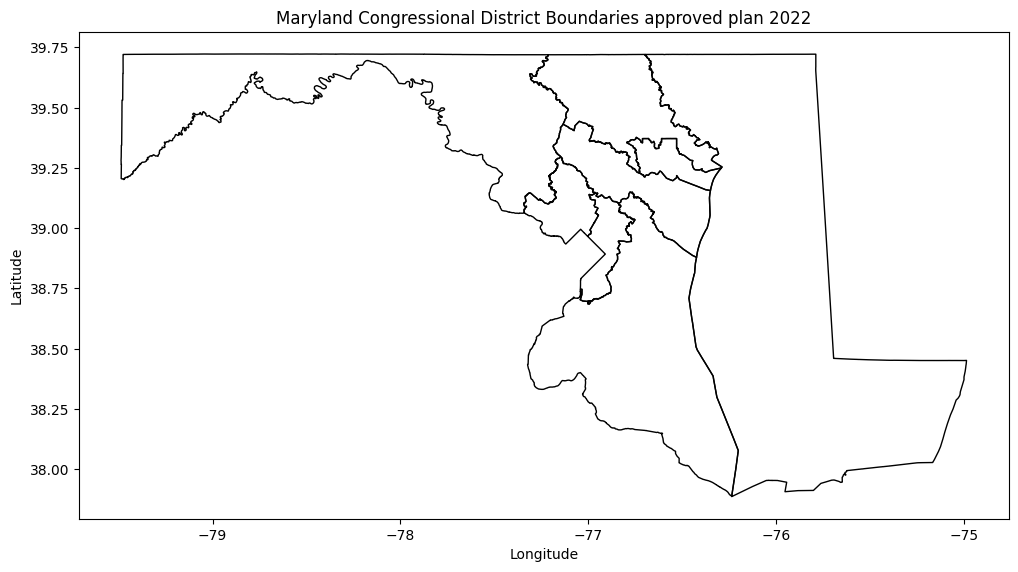

  DISTRICT  ADJ_POPULA  DEVIATION  F_DEVIATIO FORMULA_FI  ADJ_NH_WHT  \
0       01      771925        0.0    0.000000          1      556865   
1       02      771926        1.0    0.000001          2      458101   
2       03      771925        0.0    0.000000          3      440188   
3       04      771925        0.0    0.000000          4       82172   
4       05      771924       -1.0   -0.000001          5      338267   

   F_ADJ_NH_W  ADJ_HISPAN  F_ADJ_HISP  ADJ_NH_BLK  ...  F_ADJ_18_P  \
0    0.721398       43036    0.055752      113254  ...    0.786215   
1    0.593452       46530    0.060278      183267  ...    0.787472   
2    0.570247       69306    0.089783      132515  ...    0.768722   
3    0.106451      193821    0.251088      426571  ...    0.777949   
4    0.438213       55443    0.071824      305951  ...    0.770577   

   ADJ_H18_PO  F_ADJ_H18_  ADJ_NH18_W  F_ADJ_NH18  ADJ_NH18_B  F_ADJ_NH11  \
0       27339    0.045047      455755    0.750957       85129    0.14

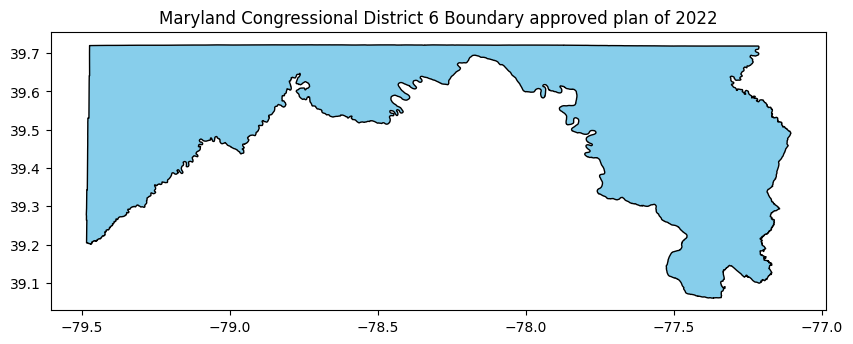

  DISTRICT  ADJ_POPULA  DEVIATION  F_DEVIATIO FORMULA_FI  ADJ_NH_WHT  \
5       06      771926        1.0    0.000001          6      466291   

   F_ADJ_NH_W  ADJ_HISPAN  F_ADJ_HISP  ADJ_NH_BLK  ...  F_ADJ_18_P  \
5    0.604062      103695    0.134333       93745  ...    0.769771   

   ADJ_H18_PO  F_ADJ_H18_  ADJ_NH18_W  F_ADJ_NH18  ADJ_NH18_B  F_ADJ_NH11  \
5       69528     0.11701      380385    0.640157       68569    0.115396   

   ADJ_NH18_A  F_ADJ_NH12                                           geometry  
5       51367    0.086446  POLYGON ((-77.45881 39.22027, -77.45866 39.220...  

[1 rows x 24 columns]
Index(['DISTRICT', 'ADJ_POPULA', 'DEVIATION', 'F_DEVIATIO', 'FORMULA_FI',
       'ADJ_NH_WHT', 'F_ADJ_NH_W', 'ADJ_HISPAN', 'F_ADJ_HISP', 'ADJ_NH_BLK',
       'F_ADJ_NH_B', 'ADJ_NH_ASN', 'F_ADJ_NH_A', 'ADJ_18_POP', 'F_ADJ_18_P',
       'ADJ_H18_PO', 'F_ADJ_H18_', 'ADJ_NH18_W', 'F_ADJ_NH18', 'ADJ_NH18_B',
       'F_ADJ_NH11', 'ADJ_NH18_A', 'F_ADJ_NH12', 'geometry'],
      dtype

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

districts_gdf=gpd.read_file('/content/SB1012-cong-shape-032822.shp')
fig, ax = plt.subplots(figsize=(12, 10))
districts_gdf.boundary.plot(ax=ax, color="black", linewidth=1)

# Customize the plot
plt.title("Maryland Congressional District Boundaries approved plan 2022")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

print(districts_gdf.head())
print(districts_gdf.columns)

district_6_variants = districts_gdf[districts_gdf['DISTRICT'].isin([6, '6', '06', '6.0', '06.0', '2406'])]

# Check if District 6 is found in any format
if not district_6_variants.empty:
    # Plot District 6 if found
    fig, ax = plt.subplots(figsize=(10, 10))
    district_6_variants.plot(ax=ax, color="skyblue", edgecolor="black")
    ax.set_title("Maryland Congressional District 6 Boundary approved plan of 2022")
    plt.show()
else:
    print("District 6 still not found. Check column format or verify if District 6 exists in the dataset.")
print(district_6_variants.head())
print(district_6_variants.columns)

In [ ]:
print(l2_voter['total_reg'].isnull().sum())  # Count missing values
print(l2_voter['total_reg'].describe())
l2_voter['total_reg'] = l2_voter['total_reg'].fillna(0)

0
count    83851.000000
mean        49.731917
std         99.846459
min          0.000000
25%          2.000000
50%         21.000000
75%         53.000000
max       1997.000000
Name: total_reg, dtype: float64


In [ ]:
print(l2_voter.g20221108_voted_all)

0        230
1         34
2          0
3          0
4          1
        ... 
83846     17
83847     21
83848    585
83849    455
83850     73
Name: g20221108_voted_all, Length: 83851, dtype: int64


In [ ]:

import pandas as pd

# Load the L2 voter and CVAP by county data
l2_voter_data = pd.read_csv("/content/l2_vtd_2022_geoid20.csv")
cvap_by_county_data = pd.read_csv("/content/md_cvap_2022_cnty.csv")

# Ensure 'geoid' columns are of the same type
l2_voter_data["GEOID20"] = l2_voter_data["GEOID20"].astype(str)
cvap_by_county_data["GEOID20"] = cvap_by_county_data["GEOID20"].astype(str)

# Merge the two datasets based on 'geoid'
merged_data = pd.merge(cvap_by_county_data, l2_voter_data, on="GEOID20", how="inner")

# Save the merged data to a file
merged_data.to_csv("2022_merged_cvap_l2_voter_data.csv", index=False)

# Display basic info and first few rows to verify
print(merged_data.info())
print(merged_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Columns: 349 entries, GEOID20 to p20200602_pct_voted_unk
dtypes: float64(114), int64(230), object(5)
memory usage: 65.6+ KB
None
  GEOID20                           NAME      STATE               COUNTY  \
0   24001      Allegany County, Maryland   Maryland      Allegany County   
1   24003  Anne Arundel County, Maryland   Maryland  Anne Arundel County   
2   24005     Baltimore County, Maryland   Maryland     Baltimore County   
3   24009       Calvert County, Maryland   Maryland       Calvert County   
4   24011      Caroline County, Maryland   Maryland      Caroline County   

   STATEFP  COUNTYFP  C_TOT22  CTOTMOE  C_NHS22  CNHSMOE  ...  \
0       24         1    67595    162.0    66375    126.0  ...   
1       24         3   566175   1648.0   524855   1213.0  ...   
2       24         5   808120   2100.0   766905   1957.0  ...   
3       24         9    92280    263.0    88150    267.0  ...   
4       24        1

In [ ]:
import pandas as pd

# Load the merged CVAP + L2 voter data and the Congressional District data
merged_data = pd.read_csv("/content/2022_merged_cvap_l2_voter_data.csv")
congressional_district_data = pd.read_csv("/content/md_cvap_2022_cd.csv")

# Ensure 'statefp' and 'geoid' columns are of the same type in both datasets
merged_data['STATEFP'] = merged_data['STATEFP'].astype(str)
congressional_district_data['STATEFP'] = congressional_district_data['STATEFP'].astype(str)


# Merge the datasets based on 'statefp' and 'geoid'
final_merged_data = pd.merge(merged_data, congressional_district_data, on=["STATEFP"], how="inner")

# Save the final merged file
final_merged_data.to_csv("2022_final_merged_congressional_data.csv", index=False)

# Display basic info and first few rows to verify
print(final_merged_data.info())
print(final_merged_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Columns: 482 entries, GEOID20_x to VAPBLKMOE_y
dtypes: float64(178), int64(296), object(8)
memory usage: 723.1+ KB
None
   GEOID20_x                     NAME_x    STATE_x           COUNTY STATEFP  \
0      24001  Allegany County, Maryland   Maryland  Allegany County      24   
1      24001  Allegany County, Maryland   Maryland  Allegany County      24   
2      24001  Allegany County, Maryland   Maryland  Allegany County      24   
3      24001  Allegany County, Maryland   Maryland  Allegany County      24   
4      24001  Allegany County, Maryland   Maryland  Allegany County      24   

   COUNTYFP  C_TOT22_x  CTOTMOE_x  C_NHS22_x  CNHSMOE_x  ...  VAP_2OM22_y  \
0         1      67595      162.0      66375      126.0  ...         2190   
1         1      67595      162.0      66375      126.0  ...         2295   
2         1      67595      162.0      66375      126.0  ...         2195   
3         1      67595   

In [ ]:
# Identify duplicate columns with '_x' and '_y' suffixes
for col in final_merged_data.columns:
    if '_x' in col:
        # Check if the corresponding '_y' column exists and they are the same
        corresponding_col = col.replace('_x', '_y')
        if corresponding_col in merged_data.columns:
            # If they are the same, drop the '_y' column
            if final_merged_data[col].equals(merged_data[corresponding_col]):
                final_merged_data.drop(columns=[corresponding_col], inplace=True)

# Verify the changes
print(final_merged_data.head())


   GEOID20_x                     NAME_x    STATE_x           COUNTY STATEFP  \
0      24001  Allegany County, Maryland   Maryland  Allegany County      24   
1      24001  Allegany County, Maryland   Maryland  Allegany County      24   
2      24001  Allegany County, Maryland   Maryland  Allegany County      24   
3      24001  Allegany County, Maryland   Maryland  Allegany County      24   
4      24001  Allegany County, Maryland   Maryland  Allegany County      24   

   COUNTYFP  C_TOT22_x  CTOTMOE_x  C_NHS22_x  CNHSMOE_x  ...  VAP_2OM22_y  \
0         1      67595      162.0      66375      126.0  ...         2190   
1         1      67595      162.0      66375      126.0  ...         2295   
2         1      67595      162.0      66375      126.0  ...         2195   
3         1      67595      162.0      66375      126.0  ...         3510   
4         1      67595      162.0      66375      126.0  ...         3915   

   VAP2OMMOE_y  VAP_HSP22_y  VAPHSPMOE_y  VAP_AIA22_y  VAPAIAM

In [ ]:
# Calculate voter turnout (Voters who voted / Total Registered Voters) * 100
# Assuming 'g20221108_voted_all' represents the voters who voted in the 2022 general election
# and 'total_reg' represents the total number of registered voters.

# Adding a new column for voter turnout
final_merged_data['voter_turnout_percentage'] = (final_merged_data['g20221108_voted_all'] / final_merged_data['total_reg']) * 100

# Calculate total registered voters for Congressional District 6 (or any other district of interest)
# Filter data for Congressional District 6 if needed
district_6_data = final_merged_data[final_merged_data['CD'] == 6]  # Assuming '2406' is the GEOID for Congressional District 6

# Total registered voters in Congressional District 6
total_registered_voters_cd6 = district_6_data['total_reg'].sum()

# Total number of voters who voted in Congressional District 6
total_voters_voted_cd6 = district_6_data['g20221108_voted_all'].sum()

# Total voter turnout for Congressional District 6
total_voter_turnout_cd6 = (total_voters_voted_cd6 / total_registered_voters_cd6) * 100

# Display the results
print(f"Total Registered Voters in Congressional District 6 for 2022: {total_registered_voters_cd6}")
print(f"Total Voters who Voted in Congressional District 6 for 2022: {total_voters_voted_cd6}")
print(f"Voter Turnout in Congressional District 6 for 2022: {total_voter_turnout_cd6:.2f}%")


Total Registered Voters in Congressional District 6 for 2022: 4170071
Total Voters who Voted in Congressional District 6 for 2022: 2010311
Voter Turnout in Congressional District 6 for 2022: 48.21%


In [ ]:
#use this
import pandas as pd

# Load the L2 voter and CVAP by county data
l2_voter_data_2020 = pd.read_csv("/content/MD_l2_2020vtd_agg_20210902.csv")
cvap_by_county_data_2020 = pd.read_csv("/content/md_cvap_2020_cnty.csv")

# Ensure 'geoid' columns are of the same type
l2_voter_data_2020['COUNTYFP'] = l2_voter_data_2020['COUNTYFP'].astype(str)
cvap_by_county_data_2020['COUNTYFP'] = cvap_by_county_data_2020['COUNTYFP'].astype(str)

# Merge the two datasets based on 'geoid'
merged_data_2020 = pd.merge(cvap_by_county_data_2020, l2_voter_data_2020, on="COUNTYFP", how="inner")

# Save the merged data to a file
merged_data_2020.to_csv("merged_cvap_l2_voter_data_2020.csv", index=False)

# Display basic info and first few rows to verify
print(merged_data_2020.info())
print(merged_data_2020.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Columns: 184 entries, GEOID_x to p20100914
dtypes: float64(12), int64(166), object(6)
memory usage: 2.8+ MB
None
   GEOID_x                       NAME      STATE           COUNTY  C_TOT20  \
0    24001  Allegany County, Maryland   Maryland  Allegany County    70370   
1    24001  Allegany County, Maryland   Maryland  Allegany County    70370   
2    24001  Allegany County, Maryland   Maryland  Allegany County    70370   
3    24001  Allegany County, Maryland   Maryland  Allegany County    70370   
4    24001  Allegany County, Maryland   Maryland  Allegany County    70370   

   CTOTMOE  C_NHS20  CNHSMOE  C_AIA20  CAIAMOE  ...  s20151208  g20141104  \
0      125    69170      122      340    88.37  ...          0        310   
1      125    69170      122      340    88.37  ...          0        310   
2      125    69170      122      340    88.37  ...          0        287   
3      125    69170      122      34

In [ ]:
import pandas as pd

# Load the merged CVAP + L2 voter data and the Congressional District data
merged_data_2020 = pd.read_csv("/content/merged_cvap_l2_voter_data_2020.csv")
congressional_district_data_2020 = pd.read_csv("/content/md_cvap_2020_cd.csv")

# Ensure 'statefp' and 'geoid' columns are of the same type in both datasets
merged_data_2020['STATEFP'] = merged_data_2020['STATEFP'].astype(str)
congressional_district_data_2020['STATEFP'] = congressional_district_data_2020['STATEFP'].astype(str)


# Merge the datasets based on 'statefp' and 'geoid'
final_merged_data_2020 = pd.merge(merged_data_2020, congressional_district_data_2020, on=["STATEFP"], how="inner")

# Save the final merged file
final_merged_data_2020.to_csv("final_merged_congressional_data_2020.csv", index=False)

# Display basic info and first few rows to verify
print(final_merged_data_2020.info())
print(final_merged_data_2020.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16040 entries, 0 to 16039
Columns: 293 entries, GEOID_x to CD
dtypes: float64(24), int64(260), object(9)
memory usage: 35.9+ MB
None
   GEOID_x                     NAME_x    STATE_x           COUNTY  C_TOT20_x  \
0    24001  Allegany County, Maryland   Maryland  Allegany County      70370   
1    24001  Allegany County, Maryland   Maryland  Allegany County      70370   
2    24001  Allegany County, Maryland   Maryland  Allegany County      70370   
3    24001  Allegany County, Maryland   Maryland  Allegany County      70370   
4    24001  Allegany County, Maryland   Maryland  Allegany County      70370   

   CTOTMOE_x  C_NHS20_x  CNHSMOE_x  C_AIA20_x  CAIAMOE_x  ...  VAPASWMOE_y  \
0        125      69170        122        340      88.37  ...          332   
1        125      69170        122        340      88.37  ...          585   
2        125      69170        122        340      88.37  ...          627   
3        125      69170 

In [ ]:
# Identify duplicate columns with '_x' and '_y' suffixes
for col in final_merged_data_2020.columns:
    if '_x' in col:
        # Check if the corresponding '_y' column exists and they are the same
        corresponding_col = col.replace('_x', '_y')
        if corresponding_col in merged_data_2020.columns:
            # If they are the same, drop the '_y' column
            if final_merged_data_2020[col].equals(merged_data_2020[corresponding_col]):
                final_merged_data_2020.drop(columns=[corresponding_col], inplace=True)

# Verify the changes
print(final_merged_data_2020.head())

   GEOID_x                     NAME_x    STATE_x           COUNTY  C_TOT20_x  \
0    24001  Allegany County, Maryland   Maryland  Allegany County      70370   
1    24001  Allegany County, Maryland   Maryland  Allegany County      70370   
2    24001  Allegany County, Maryland   Maryland  Allegany County      70370   
3    24001  Allegany County, Maryland   Maryland  Allegany County      70370   
4    24001  Allegany County, Maryland   Maryland  Allegany County      70370   

   CTOTMOE_x  C_NHS20_x  CNHSMOE_x  C_AIA20_x  CAIAMOE_x  ...  VAPASWMOE_y  \
0        125      69170        122        340      88.37  ...          332   
1        125      69170        122        340      88.37  ...          585   
2        125      69170        122        340      88.37  ...          627   
3        125      69170        122        340      88.37  ...          420   
4        125      69170        122        340      88.37  ...          468   

   VAP_BLW20_y  VAPBLWMOE_y  VAP_AIB20_y  VAPAIBMO

In [ ]:
# Calculate voter turnout (Voters who voted / Total Registered Voters) * 100
# Assuming 'g20221108_voted_all' represents the voters who voted in the 2022 general election
# and 'total_reg' represents the total number of registered voters.

# Adding a new column for voter turnout
final_merged_data_2020['voter_turnout_percentage'] = (final_merged_data_2020['g20201103'] / final_merged_data_2020['total_reg']) * 100

# Calculate total registered voters for Congressional District 6 (or any other district of interest)
# Filter data for Congressional District 6 if needed
district_6_data_2020 = final_merged_data_2020[final_merged_data_2020['CD'] == 6]  # Assuming '2406' is the GEOID for Congressional District 6

# Total registered voters in Congressional District 6
total_registered_voters_cd6_2020 = district_6_data_2020['total_reg'].sum()

# Total number of voters who voted in Congressional District 6
total_voters_voted_cd6_2020 = district_6_data_2020['g20201103'].sum()

# Total voter turnout for Congressional District 6
total_voter_turnout_cd6_2020 = (total_voters_voted_cd6_2020 / total_registered_voters_cd6_2020) * 100

# Display the results
print(f"Total Registered Voters in Congressional District 6 for 2020: {total_registered_voters_cd6_2020}")
print(f"Total Voters who Voted in Congressional District 6 for 2020: {total_voters_voted_cd6_2020}")
print(f"Voter Turnout in Congressional District 6 for 2020: {total_voter_turnout_cd6_2020:.2f}%")


Total Registered Voters in Congressional District 6 for 2020: 4077443
Total Voters who Voted in Congressional District 6 for 2020: 2985543
Voter Turnout in Congressional District 6 for 2020: 73.22%


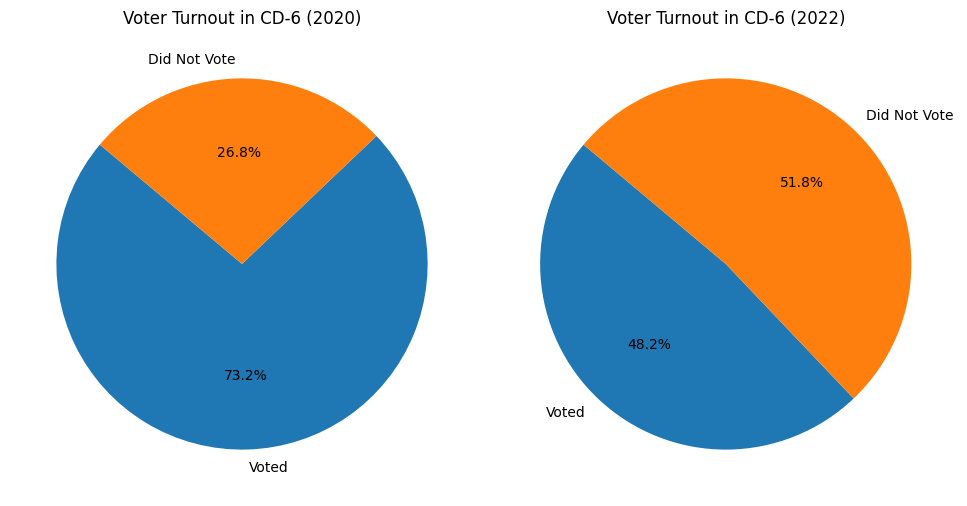

In [ ]:
import matplotlib.pyplot as plt



# Pie chart data
data_2020 = [total_voters_voted_cd6_2020, total_registered_voters_cd6_2020 - total_voters_voted_cd6_2020]
data_2022 = [total_voters_voted_cd6, total_registered_voters_cd6 - total_voters_voted_cd6]

labels = ['Voted', 'Did Not Vote']
colors = ['#1f77b4', '#ff7f0e']

# Plot for 2020
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(data_2020, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Voter Turnout in CD-6 (2020)")

# Plot for 2022
plt.subplot(1, 2, 2)
plt.pie(data_2022, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Voter Turnout in CD-6 (2022)")

# Show the plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

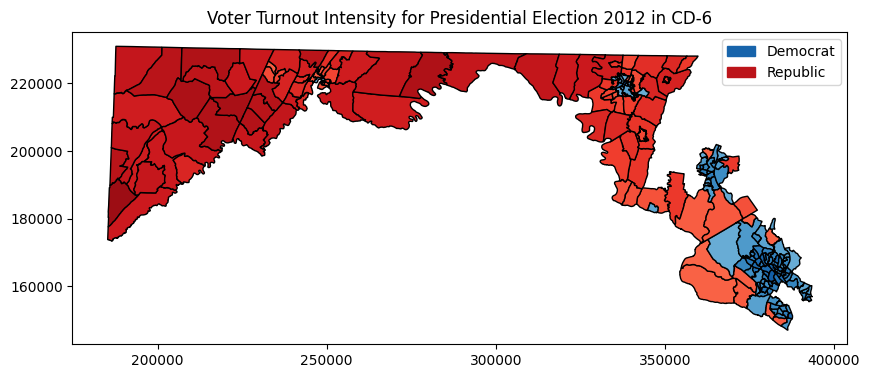

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


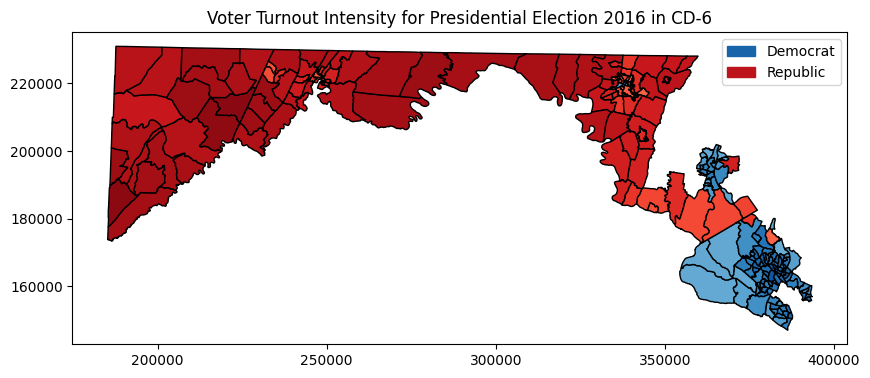

2012 - Republican winner precincts: 104
2012 - Democrat winner precincts: 111
2012 - Tie precincts: 1
2016 - Republican winner precincts: 108
2016 - Democrat winner precincts: 107
2016 - Tie precincts: 1


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Load your shapefile data
gis_data = gpd.read_file('/content/MD-precincts.shp')

# Filter for Congressional District 6
filtered_data = gis_data[gis_data['CD'] == '06']

# Calculate total votes (sum of Republican and Democrat votes)
filtered_data['PRES12T'] = filtered_data['PRES12R'] + filtered_data['PRES12D']
filtered_data['PRES16T'] = filtered_data['PRES16R'] + filtered_data['PRES16D']

# Normalize voter turnout for intensity
def calculate_intensity(row, total_votes_col, party_votes_col):
    # Ensure no division by zero
    if row[total_votes_col] == 0:
        return 0
    return row[party_votes_col] / row[total_votes_col]  # Intensity as a ratio

# Define color-mapping function with intensity
def get_color_intensity(row, total_votes_col, rep_votes_col, dem_votes_col):
    if row[rep_votes_col] > row[dem_votes_col]:  # Republican wins
        return cm.Reds(calculate_intensity(row, total_votes_col, rep_votes_col))
    elif row[dem_votes_col] > row[rep_votes_col]:  # Democrat wins
        return cm.Blues(calculate_intensity(row, total_votes_col, dem_votes_col))
    else:
        return 'green'  # Tie or other conditions

# 2012 Presidential Election: Add normalized color intensity
filtered_data['color_2012'] = filtered_data.apply(
    lambda row: get_color_intensity(row, 'PRES12T', 'PRES12R', 'PRES12D'),
    axis=1
)

# Plot 2012 Presidential Election
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
filtered_data.plot(ax=ax, color=filtered_data['color_2012'], edgecolor='black')
plt.title("Voter Turnout Intensity for Presidential Election 2012 in CD-6")
blue_patch = mpatches.Patch(color=cm.Blues(0.8), label='Democrat')
red_patch = mpatches.Patch(color=cm.Reds(0.8), label='Republic')
plt.legend(handles=[blue_patch, red_patch], loc='upper right')
plt.show()

# 2016 Presidential Election: Add normalized color intensity
filtered_data['color_2016'] = filtered_data.apply(
    lambda row: get_color_intensity(row, 'PRES16T', 'PRES16R', 'PRES16D'),
    axis=1
)

# Plot 2016 Presidential Election
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
filtered_data.plot(ax=ax, color=filtered_data['color_2016'], edgecolor='black')
plt.title("Voter Turnout Intensity for Presidential Election 2016 in CD-6")
blue_patch = mpatches.Patch(color=cm.Blues(0.8), label='Democrat')
red_patch = mpatches.Patch(color=cm.Reds(0.8), label='Republic')
plt.legend(handles=[blue_patch, red_patch], loc='upper right')
plt.show()

# Calculate counts for 2012
count_rep_2012 = (filtered_data['PRES12R'] > filtered_data['PRES12D']).sum()
count_dem_2012 = (filtered_data['PRES12R'] < filtered_data['PRES12D']).sum()
count_tie_2012 = (filtered_data['PRES12R'] == filtered_data['PRES12D']).sum()

print(f"2012 - Republican winner precincts: {count_rep_2012}")
print(f"2012 - Democrat winner precincts: {count_dem_2012}")
print(f"2012 - Tie precincts: {count_tie_2012}")

# Calculate counts for 2016
count_rep_2016 = (filtered_data['PRES16R'] > filtered_data['PRES16D']).sum()
count_dem_2016 = (filtered_data['PRES16R'] < filtered_data['PRES16D']).sum()
count_tie_2016 = (filtered_data['PRES16R'] == filtered_data['PRES16D']).sum()

print(f"2016 - Republican winner precincts: {count_rep_2016}")
print(f"2016 - Democrat winner precincts: {count_dem_2016}")
print(f"2016 - Tie precincts: {count_tie_2016}")


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

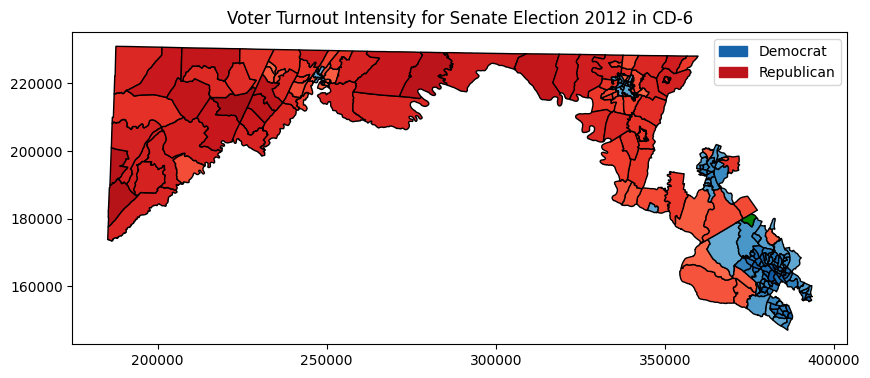

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


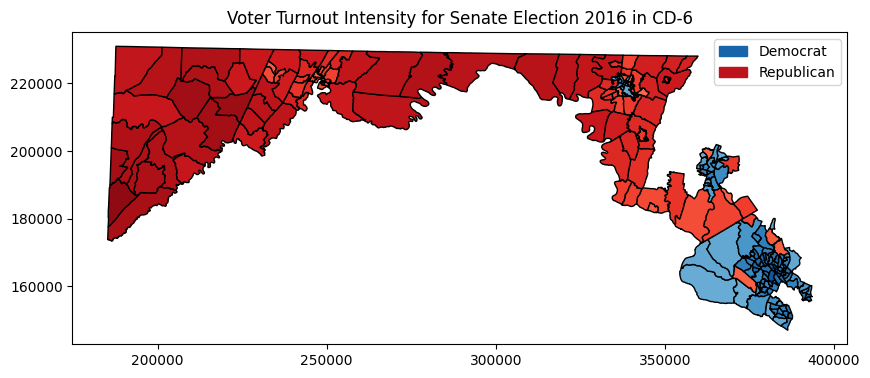

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


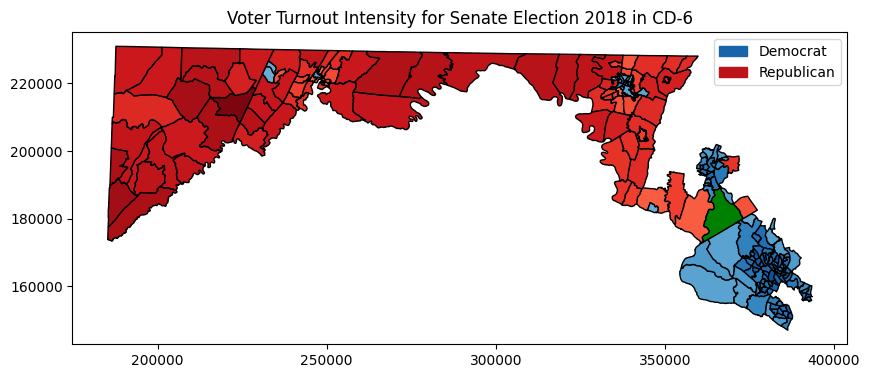

2012 Senate Election - Republican winner precincts: 100
2012 Senate Election - Democrat winner precincts: 114
2012 Senate Election - Tie precincts: 2
2016 Senate Election - Republican winner precincts: 106
2016 Senate Election - Democrat winner precincts: 109
2016 Senate Election - Tie precincts: 1
2018 Senate Election - Republican winner precincts: 91
2018 Senate Election - Democrat winner precincts: 123
2018 Senate Election - Tie precincts: 2


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Load your shapefile data
gis_data = gpd.read_file('/content/MD-precincts.shp')

# Filter for Congressional District 6
filtered_data = gis_data[gis_data['CD'] == '06']

# Calculate total votes (sum of Republican and Democrat votes)
filtered_data['SEN12T'] = filtered_data['SEN12R'] + filtered_data['SEN12D']
filtered_data['SEN16T'] = filtered_data['SEN16R'] + filtered_data['SEN16D']
filtered_data['SEN18T'] = filtered_data['SEN18R'] + filtered_data['SEN18D']

# Normalize voter turnout for intensity
def calculate_intensity(row, total_votes_col, party_votes_col):
    # Ensure no division by zero
    if row[total_votes_col] == 0:
        return 0
    return row[party_votes_col] / row[total_votes_col]  # Intensity as a ratio

# Define color-mapping function with intensity
def get_color_intensity(row, total_votes_col, rep_votes_col, dem_votes_col):
    if row[rep_votes_col] > row[dem_votes_col]:  # Republican wins
        return cm.Reds(calculate_intensity(row, total_votes_col, rep_votes_col))
    elif row[dem_votes_col] > row[rep_votes_col]:  # Democrat wins
        return cm.Blues(calculate_intensity(row, total_votes_col, dem_votes_col))
    else:
        return 'green'  # Tie or other conditions

# 2012 Senate Election: Add normalized color intensity
filtered_data['color_sen_2012'] = filtered_data.apply(
    lambda row: get_color_intensity(row, 'SEN12T', 'SEN12R', 'SEN12D'),
    axis=1
)

# Plot 2012 Senate Election
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
filtered_data.plot(ax=ax, color=filtered_data['color_sen_2012'], edgecolor='black')
plt.title("Voter Turnout Intensity for Senate Election 2012 in CD-6")
blue_patch = mpatches.Patch(color=cm.Blues(0.8), label='Democrat')
red_patch = mpatches.Patch(color=cm.Reds(0.8), label='Republican')
plt.legend(handles=[blue_patch, red_patch], loc='upper right')
plt.show()

# 2016 Senate Election: Add normalized color intensity
filtered_data['color_sen_2016'] = filtered_data.apply(
    lambda row: get_color_intensity(row, 'SEN16T', 'SEN16R', 'SEN16D'),
    axis=1
)

# Plot 2016 Senate Election
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
filtered_data.plot(ax=ax, color=filtered_data['color_sen_2016'], edgecolor='black')
plt.title("Voter Turnout Intensity for Senate Election 2016 in CD-6")
blue_patch = mpatches.Patch(color=cm.Blues(0.8), label='Democrat')
red_patch = mpatches.Patch(color=cm.Reds(0.8), label='Republican')
plt.legend(handles=[blue_patch, red_patch], loc='upper right')
plt.show()

# 2018 Senate Election: Add normalized color intensity
filtered_data['color_sen_2018'] = filtered_data.apply(
    lambda row: get_color_intensity(row, 'SEN18T', 'SEN18R', 'SEN18D'),
    axis=1
)

# Plot 2018 Senate Election
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
filtered_data.plot(ax=ax, color=filtered_data['color_sen_2018'], edgecolor='black')
plt.title("Voter Turnout Intensity for Senate Election 2018 in CD-6")
blue_patch = mpatches.Patch(color=cm.Blues(0.8), label='Democrat')
red_patch = mpatches.Patch(color=cm.Reds(0.8), label='Republican')
plt.legend(handles=[blue_patch, red_patch], loc='upper right')
plt.show()

# Calculate counts for 2012
count_rep_sen_2012 = (filtered_data['SEN12R'] > filtered_data['SEN12D']).sum()
count_dem_sen_2012 = (filtered_data['SEN12R'] < filtered_data['SEN12D']).sum()
count_tie_sen_2012 = (filtered_data['SEN12R'] == filtered_data['SEN12D']).sum()

print(f"2012 Senate Election - Republican winner precincts: {count_rep_sen_2012}")
print(f"2012 Senate Election - Democrat winner precincts: {count_dem_sen_2012}")
print(f"2012 Senate Election - Tie precincts: {count_tie_sen_2012}")

# Calculate counts for 2016
count_rep_sen_2016 = (filtered_data['SEN16R'] > filtered_data['SEN16D']).sum()
count_dem_sen_2016 = (filtered_data['SEN16R'] < filtered_data['SEN16D']).sum()
count_tie_sen_2016 = (filtered_data['SEN16R'] == filtered_data['SEN16D']).sum()

print(f"2016 Senate Election - Republican winner precincts: {count_rep_sen_2016}")
print(f"2016 Senate Election - Democrat winner precincts: {count_dem_sen_2016}")
print(f"2016 Senate Election - Tie precincts: {count_tie_sen_2016}")

# Calculate counts for 2018
count_rep_sen_2018 = (filtered_data['SEN18R'] > filtered_data['SEN18D']).sum()
count_dem_sen_2018 = (filtered_data['SEN18R'] < filtered_data['SEN18D']).sum()
count_tie_sen_2018 = (filtered_data['SEN18R'] == filtered_data['SEN18D']).sum()

print(f"2018 Senate Election - Republican winner precincts: {count_rep_sen_2018}")
print(f"2018 Senate Election - Democrat winner precincts: {count_dem_sen_2018}")
print(f"2018 Senate Election - Tie precincts: {count_tie_sen_2018}")


In [ ]:
import geopandas as gpd

# Load your shapefile
gdf = gpd.read_file("/content/MD-precincts.shp")

# Print the CRS
print(gdf.crs)

EPSG:26985


Cross-Validated R² Scores: [0.82740195 0.78979292 0.83886488 0.80718656 0.83958227]
Average Cross-Validated R² Score: 0.8205657167168814
Mean Absolute Error: 0.01591827964593924
R² Score: 0.7917898140810203


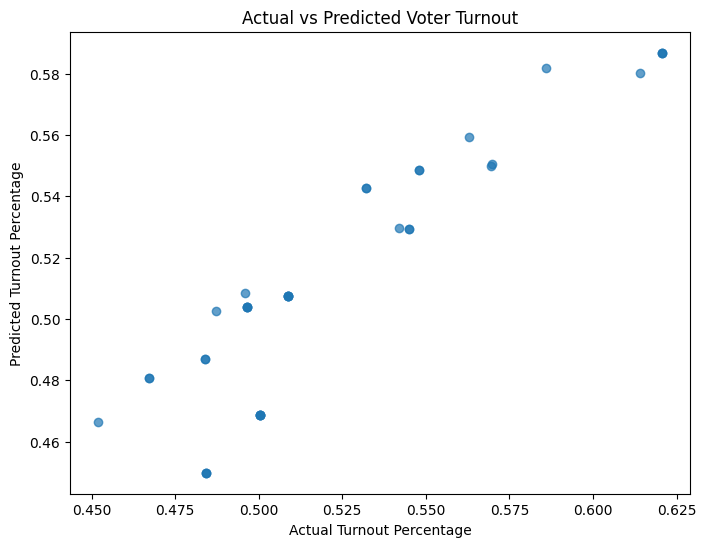

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
# Example: Load your merged dataset
df = pd.read_csv("/content/2022_final_merged_congressional_data.csv")

features = [
    'age_18_19', 'age_20_24', 'age_25_29', 'age_30_34', 'age_35_44', 'age_45_54',
    'age_55_64', 'age_65_74', 'age_75_84', 'age_85over',
    'voters_gender_m', 'voters_gender_f', 'voters_gender_unknown',
    'party_dem', 'party_rep', 'party_npp', 'party_lib', 'party_oth', 'party_unk',
    'eth1_eur', 'eth1_hisp', 'eth1_aa', 'eth1_esa', 'eth1_oth', 'eth1_unk',
    'commercialdata_estimatedhhincomeamount_avg'
]

# Define X (features) and y (target)
X = df[features]
y = df['g20221108_pct_voted_all']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize and train the random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Selecting features (use the important ones based on correlation and importance)
selected_features = ['eth1_aa', 'commercialdata_estimatedhhincomeamount_avg', 'age_18_19', 'age_85over', 'party_rep']
X = df[selected_features]  # Replace 'df' with your actual DataFrame
y = df['g20221108_pct_voted_all']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regularized Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,          # Number of trees
    max_depth=10,              # Limiting depth to reduce overfitting
    min_samples_split=20,      # Minimum samples to split a node (higher values prevent overfitting)
    min_samples_leaf=10,       # Minimum samples per leaf node
    max_features='sqrt',       # Randomly consider a subset of features at each split
    random_state=42
)

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validated R² Scores:", cv_scores)
print("Average Cross-Validated R² Score:", cv_scores.mean())

# Train model and predict
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Scatter plot: True vs Predicted turnout
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Turnout Percentage")
plt.ylabel("Predicted Turnout Percentage")
plt.title("Actual vs Predicted Voter Turnout")
plt.show()


Cross-Validated R² Scores: [0.98865514 0.98773671 0.99006101 0.98994193 0.98860646]
Average Cross-Validated R² Score: 0.989000250260046
Mean Absolute Error: 56.45431014409758
R² Score: 0.9920757585193134


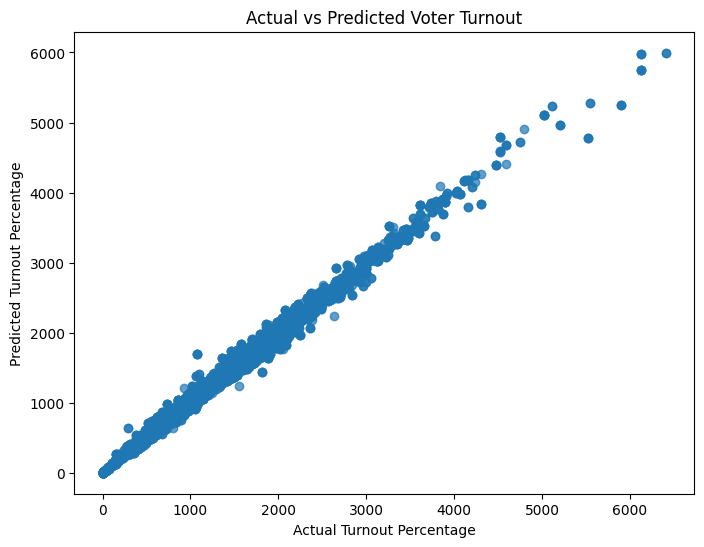

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Stratified Cross-Validated R² Scores: [0.99119874 0.990779   0.99147254 0.99186528 0.99100487 0.99118591
 0.99143224 0.99154641 0.99119854 0.9911171 ]
Average Stratified Cross-Validated R² Score: 0.9912800631002459
Holdout R² Score: 0.9918357702968023
Holdout Mean Absolute Error: 56.3936913553759


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE

# Load your dataset
df = pd.read_csv("/content/final_merged_congressional_data_2020.csv")

# Features for training
features = [
    'age_18_19', 'age_20_24', 'age_25_29', 'age_30_34', 'age_35_44', 'age_45_54',
    'age_55_64', 'age_65_74', 'age_75_84', 'age_85over',
    'party_dem', 'party_rep', 'party_npp', 'party_lib', 'party_oth', 'party_unk',
    'eth1_eur', 'eth1_hisp', 'eth1_aa', 'eth1_esa', 'eth1_oth', 'eth1_unk',
    'C_TOT20_x', 'CTOTMOE_x', 'C_NHS20_x', 'CNHSMOE_x', 'C_AIA20_x', 'CAIAMOE_x'
]

# Define X (features) and y (target)
X = df[features]
y = df['g20201103']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature selection using Recursive Feature Elimination (RFE)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
selector = RFE(rf_model, n_features_to_select=5)  # Reduce to top 5 features
selector = selector.fit(X_train, y_train)

# Select the top features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Regularized Random Forest Regressor with stricter parameters
rf_model = RandomForestRegressor(
    n_estimators=100,          # Number of trees
    max_depth=10,              # Limiting depth to reduce overfitting
    min_samples_split=20,      # Minimum samples to split a node (higher values prevent overfitting)
    min_samples_leaf=10,       # Minimum samples per leaf node
    max_features='sqrt',       # Randomly consider a subset of features at each split
    random_state=42
)

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train_selected, y_train, cv=5, scoring='r2')
print("Cross-Validated R² Scores:", cv_scores)
print("Average Cross-Validated R² Score:", cv_scores.mean())

# Train model and predict
rf_model.fit(X_train_selected, y_train)
y_pred = rf_model.predict(X_test_selected)

# Metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Scatter plot: True vs Predicted turnout
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Turnout Percentage")
plt.ylabel("Predicted Turnout Percentage")
plt.title("Actual vs Predicted Voter Turnout")
plt.show()
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train_selected, y_train, cv=cv, scoring='r2')
print("Stratified Cross-Validated R² Scores:", cv_scores)
print("Average Stratified Cross-Validated R² Score:", cv_scores.mean())
X_holdout, X_final_test, y_holdout, y_final_test = train_test_split(X_test_selected, y_test, test_size=0.5, random_state=42)

# Predict on holdout set
y_holdout_pred = rf_model.predict(X_holdout)

# Evaluate on holdout
print("Holdout R² Score:", r2_score(y_holdout, y_holdout_pred))
print("Holdout Mean Absolute Error:", mean_absolute_error(y_holdout, y_holdout_pred))


In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the datasets
df_2020 = pd.read_csv("/content/final_merged_congressional_data_2020.csv")  # 2020 data
df_2022 = pd.read_csv("/content/2022_final_merged_congressional_data.csv")  # 2022 data
df_2024 = pd.read_csv("/content/VTD_CD_2024 - Sheet1.csv")  # 2024 data

# Ensure the features are consistent
# Remove the "Total" row from 2024 data
df_2024_no_total = df_2024[df_2024['CD'] != 'Total']

# Ensure the features are consistent
features_2020 = ['party_dem', 'party_rep', 'party_lib', 'party_npp', 'party_oth']
features_2022 = ['party_dem', 'party_rep', 'party_lib', 'party_npp', 'party_oth']

# Combine 2020 and 2022 features and turnout
df_combined = pd.DataFrame()
df_combined[features_2020] = pd.concat([df_2020[features_2020], df_2022[features_2022]], ignore_index=True)
df_combined['Turnout'] = pd.concat([df_2020['g20201103'], df_2022['g20221108_pct_voted_all']], ignore_index=True)

# Feature scaling (standardization)
scaler = StandardScaler()
df_combined_scaled = scaler.fit_transform(df_combined[features_2020])

# Perform KMeans clustering on the scaled data
kmeans = KMeans(n_clusters=5, random_state=42)  # Increase the number of clusters
df_combined['Cluster'] = kmeans.fit_predict(df_combined_scaled)

# Average turnout by cluster (based on 2020 and 2022 data)
cluster_avg_turnout = df_combined.groupby('Cluster')['Turnout'].mean()

# Predict for 2024 (excluding 'Total' row)
df_2024_no_total_scaled = scaler.transform(df_2024_no_total[features_2020])  # Scale the 2024 data with the same scaler
df_2024_no_total['Cluster'] = kmeans.predict(df_2024_no_total_scaled)
df_2024_no_total['Predicted_Turnout'] = df_2024_no_total['Cluster'].map(cluster_avg_turnout)

#Output the predicted turnout for the 2024 districts (excluding 'Total' row)
print("Predicted Turnout for 2024 (excluding 'Total' row):")
print(df_2024_no_total[['CD', 'Predicted_Turnout']])



Predicted Turnout for 2024 (excluding 'Total' row):
  CD  Predicted_Turnout
0  1             0.5081
1  2             0.5081
2  3             0.5081
3  4             0.3907
4  5             0.5003
5  6             0.5081
6  7             0.3907
7  8             0.5003


<ipython-input-67-9d95558eac3b>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024_no_total['Cluster'] = kmeans.predict(df_2024_no_total_scaled)
<ipython-input-67-9d95558eac3b>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024_no_total['Predicted_Turnout'] = df_2024_no_total['Cluster'].map(cluster_avg_turnout)
